<a href="https://colab.research.google.com/github/virtualspark/YCNG232-NLP_Fundamentals/blob/main/Reflexion_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
#install.packages("tidytext") 
#install.packages("tm") 
#install.packages("textdata")

NULL


In [3]:
%%R
library(tidytext)
library(textdata)
library(dplyr)

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




In [4]:
%%R
# s1 assigns a category to each
s1 <- get_sentiments("nrc")
head(s1, 10)
# s1 %>% count(sentiment)

# A tibble: 10 × 2
   word        sentiment
   <chr>       <chr>    
 1 abacus      trust    
 2 abandon     fear     
 3 abandon     negative 
 4 abandon     sadness  
 5 abandoned   anger    
 6 abandoned   fear     
 7 abandoned   negative 
 8 abandoned   sadness  
 9 abandonment anger    
10 abandonment fear     


In [5]:
%%R
# s2 assigns a numeric score
s2 <- get_sentiments("afinn")
head(s2)
s2 %>% count(value)

# A tibble: 11 × 2
   value     n
   <dbl> <int>
 1    -5    16
 2    -4    43
 3    -3   264
 4    -2   966
 5    -1   309
 6     0     1
 7     1   208
 8     2   448
 9     3   172
10     4    45
11     5     5


In [6]:
%%R
library(tidyr)
# s3 is just positive/negative
s3 <- get_sentiments("bing")
head(s3)
# s3 %>% count(sentiment)
# count_s3_sentiment <- s3 %>% count(sentiment) %>% mutate(percent = n/sum(n)) %>% select(-n)
# head(count_s3_sentiment)

# A tibble: 6 × 2
  word       sentiment
  <chr>      <chr>    
1 2-faces    negative 
2 abnormal   negative 
3 abolish    negative 
4 abominable negative 
5 abominably negative 
6 abominate  negative 


In [7]:
%%R
s4 <- get_sentiments("loughran")
head(s4,10)
# s4 %>% count(sentiment)

# A tibble: 10 × 2
   word         sentiment
   <chr>        <chr>    
 1 abandon      negative 
 2 abandoned    negative 
 3 abandoning   negative 
 4 abandonment  negative 
 5 abandonments negative 
 6 abandons     negative 
 7 abdicated    negative 
 8 abdicates    negative 
 9 abdicating   negative 
10 abdication   negative 


In [8]:
# Question 1 - Combining 3 lexicons (s1, s2 and s3)

In [9]:
%%R
s1_s3 <- rbind(s1, s3)
s1_s3_cleaned <- s1_s3[order(s1_s3$word),] 
s1_s3_cleaned <- s1_s3_cleaned[!duplicated(s1_s3_cleaned), ]

In [10]:
%%R
head(s1_s3_cleaned, 20)
s1_s3_cleaned %>% count(sentiment)

# A tibble: 10 × 2
   sentiment        n
   <chr>        <int>
 1 anger         1245
 2 anticipation   837
 3 disgust       1056
 4 fear          1474
 5 joy            687
 6 negative      6425
 7 positive      3632
 8 sadness       1187
 9 surprise       532
10 trust         1230


In [11]:
%%R
s1_s2_s3 <- merge(s1_s3_cleaned, s2, by="word", all=T)
head(s1_s2_s3, 20)

          word sentiment value
1      2-faces  negative    NA
2       abacus     trust    NA
3      abandon      fear    -2
4      abandon   sadness    -2
5      abandon  negative    -2
6    abandoned     anger    -2
7    abandoned      fear    -2
8    abandoned  negative    -2
9    abandoned   sadness    -2
10 abandonment     anger    NA
11 abandonment      fear    NA
12 abandonment  negative    NA
13 abandonment   sadness    NA
14 abandonment  surprise    NA
15    abandons      <NA>    -2
16        abba  positive    NA
17       abbot     trust    NA
18    abducted      <NA>    -2
19   abduction  surprise    -2
20   abduction   sadness    -2


In [12]:
# Question 2 - Percentage of words found in S1, S2 and S3

In [13]:
%%R
library(tidyverse)
library(rvest)


✔ tibble  3.1.7     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rvest’



    guess_encoding




In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
%%R
amzn_dataset <- read.csv('/content/drive/My Drive/NLP/Week3/amazon_uk_shoes_products_dataset_2021_12.csv')

In [16]:
%%R
# head(amzn_dataset)

NULL


In [17]:
%%R
library(dplyr)

amzn_reviews <- amzn_dataset %>% select(c('product_name', 'review_text'))

In [18]:
%%R
head(amzn_reviews)

                                                     product_name
1 Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK
2 Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK
3 Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK
4 Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK
5               GUESS Women's Bradly Gymnastics Shoe, White, 7 UK
6               GUESS Women's Bradly Gymnastics Shoe, White, 7 UK
                                                                                                                                                                                                                                                                                                                                                                    review_text
1                                                                                                                                                           Love these. Wa

In [19]:
%%R
amzn_adidas_reviews <- dplyr::filter(amzn_reviews, grepl('(?i)Adidas', product_name))
amzn_nike_reviews <- dplyr::filter(amzn_reviews, grepl('(?i)Nike', product_name))
amzn_reebok_reviews <- dplyr::filter(amzn_reviews, grepl('(?i)Reebok', product_name))

In [20]:
%%R
adidas_reviews_only <- amzn_adidas_reviews %>% select(c('review_text'))
adidas_data <- adidas_reviews_only %>% unnest_tokens(word, review_text)
adidas_data <- cbind(Brand = 'Adidas', adidas_data)
head(adidas_data)

   Brand    word
1 Adidas    true
2 Adidas      to
3 Adidas    size
4 Adidas      if
5 Adidas between
6 Adidas     i'd


In [21]:
%%R
nike_reviews_only <- amzn_nike_reviews %>% select(c('review_text'))
nike_data <- nike_reviews_only %>% unnest_tokens(word, review_text)
nike_data <- cbind(Brand = 'Nike', nike_data)
head(nike_data)

  Brand     word
1  Nike      top
2  Nike    class
3  Nike  product
4  Nike     high
5  Nike  quality
6  Nike original


In [22]:
%%R
reebok_reviews_only <- amzn_reebok_reviews %>% select(c('review_text'))
reebok_data <- reebok_reviews_only %>% unnest_tokens(word, review_text)
reebok_data <- cbind(Brand = 'Reebok', reebok_data)
head(reebok_data)

   Brand        word
1 Reebok          ho
2 Reebok  acquistato
3 Reebok      queste
4 Reebok      scarpe
5 Reebok         per
6 Reebok utilizzarle


In [23]:
%%R
combo <- rbind(adidas_data, nike_data, reebok_data)
combo %>% count(Brand)

   Brand     n
1 Adidas 32005
2   Nike  1440
3 Reebok 15566


In [24]:
%%R
head(combo)

   Brand    word
1 Adidas    true
2 Adidas      to
3 Adidas    size
4 Adidas      if
5 Adidas between
6 Adidas     i'd


In [25]:
%%R
clean <- combo %>% filter(!word %in% stop_words$word)
head(clean)

   Brand  word
1 Adidas  true
2 Adidas  size
3 Adidas lower
4 Adidas   i.e
5 Adidas     8
6 Adidas   8.5


In [26]:
# Percentage of words present in the lexicon S1 ("nrc")

In [27]:
%%R
categorical_s1 <- clean %>% inner_join(s1)
all_categorical_s1 <- categorical_s1 %>% count(Brand, sentiment, sort = TRUE)
all_categorical_s1

Joining, by = "word"
    Brand    sentiment    n
1  Adidas     positive 1122
2  Adidas     negative  721
3  Adidas        trust  697
4  Adidas          joy  579
5  Adidas anticipation  528
6  Reebok     positive  511
7  Reebok        trust  347
8  Reebok     negative  344
9  Adidas      sadness  279
10 Reebok          joy  263
11 Adidas        anger  247
12 Reebok anticipation  227
13 Adidas         fear  200
14 Reebok      sadness  185
15 Adidas      disgust  170
16 Adidas     surprise  166
17 Reebok        anger  110
18 Reebok         fear  110
19 Reebok      disgust   91
20 Reebok     surprise   79
21   Nike     negative   38
22   Nike      sadness   27
23   Nike         fear   24
24   Nike      disgust   14
25   Nike     positive   13
26   Nike        trust   11
27   Nike        anger    6
28   Nike anticipation    6
29   Nike          joy    5
30   Nike     surprise    1


In [28]:
%%R
nrow(categorical_s1)/nrow(clean)

[1] 0.334492


In [29]:
# Percentage of words present in the lexicon S2 ("afinn")

In [30]:
%%R
categorical_s2 <- clean %>% inner_join(s2)
all_categorical_s2 <- categorical_s2 %>% count(Brand, value, sort = TRUE)
head(all_categorical_s2)

Joining, by = "word"
   Brand value   n
1 Adidas     2 576
2 Adidas     3 444
3 Adidas     1 327
4 Reebok     2 249
5 Reebok     3 196
6 Adidas    -2 194


In [31]:
%%R
nrow(categorical_s2)/nrow(clean)

[1] 0.1273428


In [32]:
# Percentage of words present in the lexicon S3 ("bing")

In [33]:
%%R
categorical_s3 <- clean %>% inner_join(s3)
all_categorical_s3 <- categorical_s3 %>% count(Brand, sentiment, sort = TRUE)
head(all_categorical_s3)

Joining, by = "word"
   Brand sentiment    n
1 Adidas  positive 1384
2 Adidas  negative  628
3 Reebok  positive  582
4 Reebok  negative  297
5   Nike  positive   40
6   Nike  negative   32


In [34]:
%%R
nrow(categorical_s3)/nrow(clean)

[1] 0.1391799


In [35]:
# Question 3 - Top 10 positive words and top 10 negative words

In [36]:
%%R
categorical_s1_s2_s3 <- clean %>% inner_join(s1_s2_s3)
all_categorical_s1_s2_s3 <- categorical_s1_s2_s3 %>% count(word, sentiment, sort = TRUE)

Joining, by = "word"


In [37]:
%%R
all_categorical_s1_s2_s3_positive <- dplyr::filter(all_categorical_s1_s2_s3, grepl('positive', sentiment))
head(all_categorical_s1_s2_s3_positive, 10)

          word sentiment   n
1  comfortable  positive 279
2         love  positive 179
3         nice  positive  96
4      perfect  positive  95
5        super  positive  94
6    recommend  positive  74
7        loves  positive  64
8      support  positive  63
9         true  positive  55
10        cute  positive  53


In [38]:
%%R
all_categorical_s1_s2_s3_negative <- dplyr::filter(all_categorical_s1_s2_s3, grepl('negative', sentiment))
head(all_categorical_s1_s2_s3_negative, 10)

           word sentiment   n
1          wear  negative 164
2          fits  negative  62
3          hard  negative  55
4          heel  negative  43
5           die  negative  42
6          worn  negative  41
7          hurt  negative  26
8        bottom  negative  24
9  disappointed  negative  24
10        stiff  negative  22


In [39]:
# Question 4 - Quantify the range of sentiments

In [40]:
%%R
head(all_categorical_s2)

   Brand value   n
1 Adidas     2 576
2 Adidas     3 444
3 Adidas     1 327
4 Reebok     2 249
5 Reebok     3 196
6 Adidas    -2 194


In [41]:
%%R
all_categorical_s2 <- all_categorical_s2[order(all_categorical_s2$Brand),]

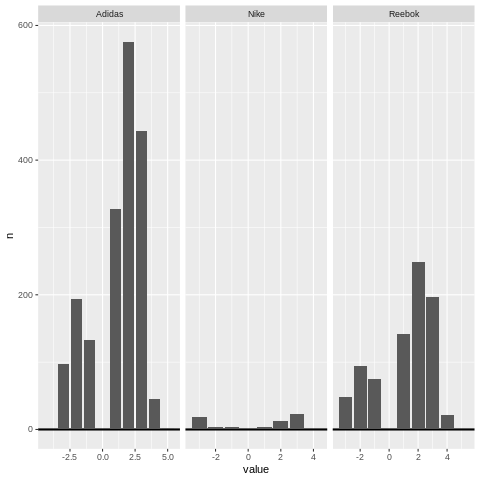

In [42]:
%%R
ggplot(data=all_categorical_s2, aes(value, n)) +
  facet_wrap(~Brand, ncol = 3, scales = "free_x") +
  geom_hline(yintercept = 0, color = "black", size = 1) +
  geom_bar(stat="identity")

In [43]:
# Question 5 - Percentage of documents considered neutral or mixed

In [44]:
# Assuming range value of -1 to 1 to be neutral using "afinn"

In [45]:
%%R
# Calculate the n * value
all_categorical_s2$total <- all_categorical_s2$n * all_categorical_s2$value

In [46]:
%%R
all_categorical_s2

    Brand value   n total
1  Adidas     2 576  1152
2  Adidas     3 444  1332
3  Adidas     1 327   327
6  Adidas    -2 194  -388
8  Adidas    -1 133  -133
9  Adidas    -3  97  -291
13 Adidas     4  45   180
21 Adidas     5   2    10
22 Adidas    -4   1    -4
14   Nike     3  23    69
16   Nike    -3  19   -57
17   Nike     2  13    26
18   Nike    -2   3    -6
19   Nike    -1   3    -3
20   Nike     1   3     3
23   Nike     4   1     4
4  Reebok     2 249   498
5  Reebok     3 196   588
7  Reebok     1 142   142
10 Reebok    -2  94  -188
11 Reebok    -1  75   -75
12 Reebok    -3  48  -144
15 Reebok     4  22    88
24 Reebok     5   1     5


In [47]:
%%R
group_sum_all_categorical_s2 <- all_categorical_s2 %>%
    group_by(Brand) %>% 
    summarise_each(funs(sum))

In [48]:
%%R
# Calculate the mean
group_sum_all_categorical_s2$mean <- group_sum_all_categorical_s2$total / group_sum_all_categorical_s2$n

In [49]:
%%R
group_sum_all_categorical_s2

# A tibble: 3 × 5
  Brand  value     n total  mean
  <chr>  <dbl> <int> <dbl> <dbl>
1 Adidas     5  1819  2185 1.20 
2 Nike       4    65    36 0.554
3 Reebok     9   827   914 1.11 


In [50]:
%%R
group_sum_all_categorical_s2$sentiment <- ifelse(group_sum_all_categorical_s2$mean>=-1 & group_sum_all_categorical_s2$mean<=1, 'Neutral/Mixed', ifelse(group_sum_all_categorical_s2$mean<'-1', 'Negative', 'Positive'))

In [51]:
%%R
head(group_sum_all_categorical_s2)

# A tibble: 3 × 6
  Brand  value     n total  mean sentiment    
  <chr>  <dbl> <int> <dbl> <dbl> <chr>        
1 Adidas     5  1819  2185 1.20  Positive     
2 Nike       4    65    36 0.554 Neutral/Mixed
3 Reebok     9   827   914 1.11  Positive     


In [52]:
%%R
nrow(group_sum_all_categorical_s2 %>% filter(sentiment %in% 'Neutral/Mixed'))/nrow(group_sum_all_categorical_s2)

[1] 0.3333333


In [53]:
# In this case, 1/3 of the documents are considered neutral

In [54]:
# Question 6 - Visualize results of sentiment quantification

In [55]:
%%R
library(ggplot2)
library(repr)
library(scales)

Attaching package: ‘scales’



    discard



    col_factor




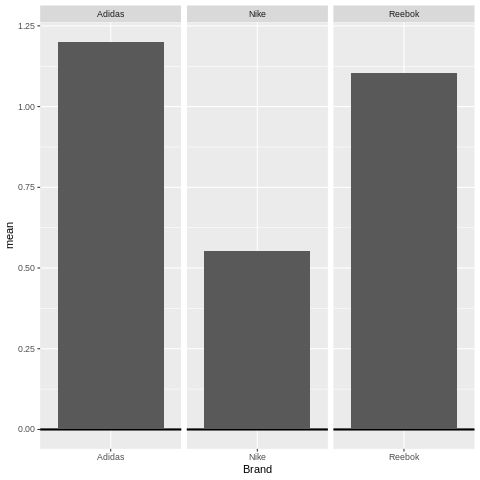

In [56]:
%%R
ggplot(data=group_sum_all_categorical_s2, aes(Brand, mean)) +
  facet_wrap(~Brand, ncol = 3, scales = "free_x") +
  geom_hline(yintercept = 0, color = "black", size = 1) +
  geom_bar(stat="identity")